In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [ ]:
# Load the CSV file

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
file_path = "/content/drive/My Drive/train.csv"
data = pd.read_csv(file_path)
data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
# Display the first few rows of the dataset to understand its structure
data.head()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [ ]:
data.shape

(1117957, 22)

In [ ]:
# Check Null Values
data.isnull().values.any()

np.False_

In [ ]:
print("There is {} missing values in data frame".format(data.isnull().sum().sum()))

There is 0 missing values in data frame


In [ ]:
print("There is {} duplicated values in data frame".format(data.duplicated().sum()))

There is 0 duplicated values in data frame


In [ ]:
len(data.columns)

22

In [ ]:
data.describe()

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,...,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06,1.117957e+06
mean,5.589780e+05,4.921450e+00,4.926671e+00,4.955322e+00,4.942240e+00,4.942517e+00,4.934093e+00,4.955878e+00,4.927791e+00,4.942619e+00,...,4.946893e+00,4.953999e+00,4.931376e+00,4.929032e+00,4.925907e+00,4.927520e+00,4.950859e+00,4.940587e+00,4.939004e+00,5.044803e-01
std,3.227265e+05,2.056387e+00,2.093879e+00,2.072186e+00,2.051689e+00,2.083391e+00,2.057742e+00,2.083063e+00,2.065992e+00,2.068545e+00,...,2.072333e+00,2.088899e+00,2.078287e+00,2.082395e+00,2.064813e+00,2.074176e+00,2.068696e+00,2.081123e+00,2.090350e+00,5.102610e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.850000e-01
25%,2.794890e+05,3.000000e+00,3.000000e+00,4.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,...,4.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.000000e+00,3.000000e+00,4.700000e-01
50%,5.589780e+05,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.050000e-01
75%,8.384670e+05,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,5.400000e-01
max,1.117956e+06,1.600000e+01,1.800000e+01,1.600000e+01,1.700000e+01,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.700000e+01,1.700000e+01,1.600000e+01,1.600000e+01,1.700000e+01,1.800000e+01,1.900000e+01,1.600000e+01,1.600000e+01,7.250000e-01


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

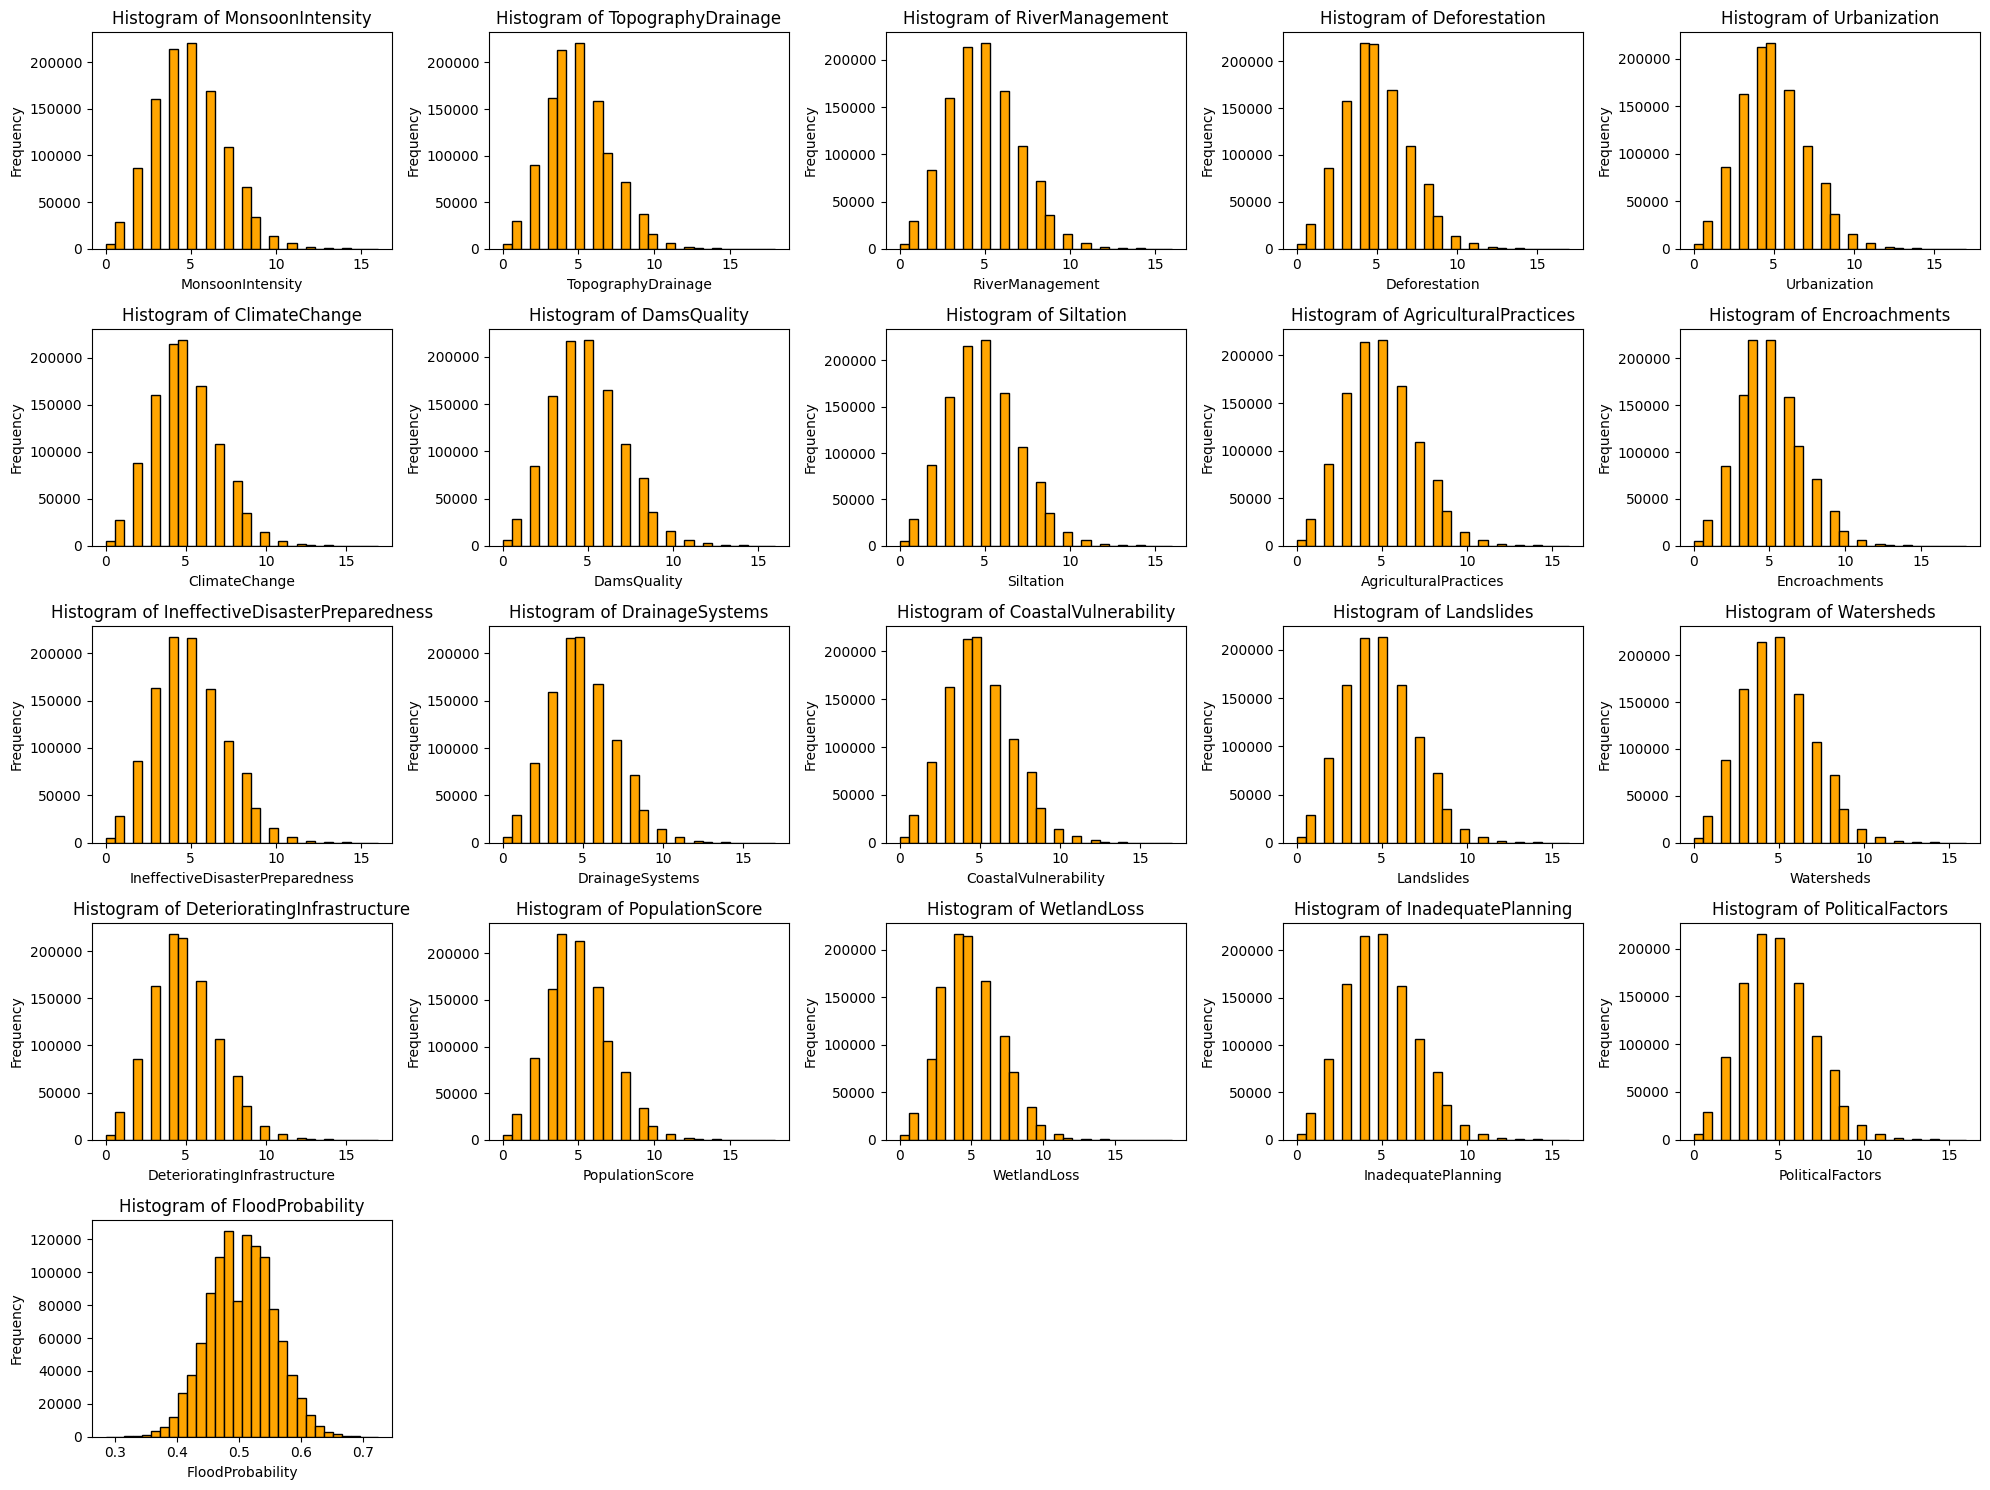

In [ ]:
# Get all feature columns from the current X DataFrame, including new interaction features
feature_columns_to_plot = data.columns.drop(['id'])

# Set the number of columns for subplots

# Calculate the number of rows and columns for the subplot grid
num_features = len(feature_columns_to_plot)
num_cols = 5 # Let's aim for 5 columns per row
num_rows = (num_features + num_cols - 1) // num_cols # Calculate rows needed

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 4, num_rows * 3))
axes = axes.flatten()

# Loop through the feature columns and plot the histograms
for i, column in enumerate(feature_columns_to_plot):
    axes[i].hist(data[column], bins=30, color='orange', edgecolor='black')
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

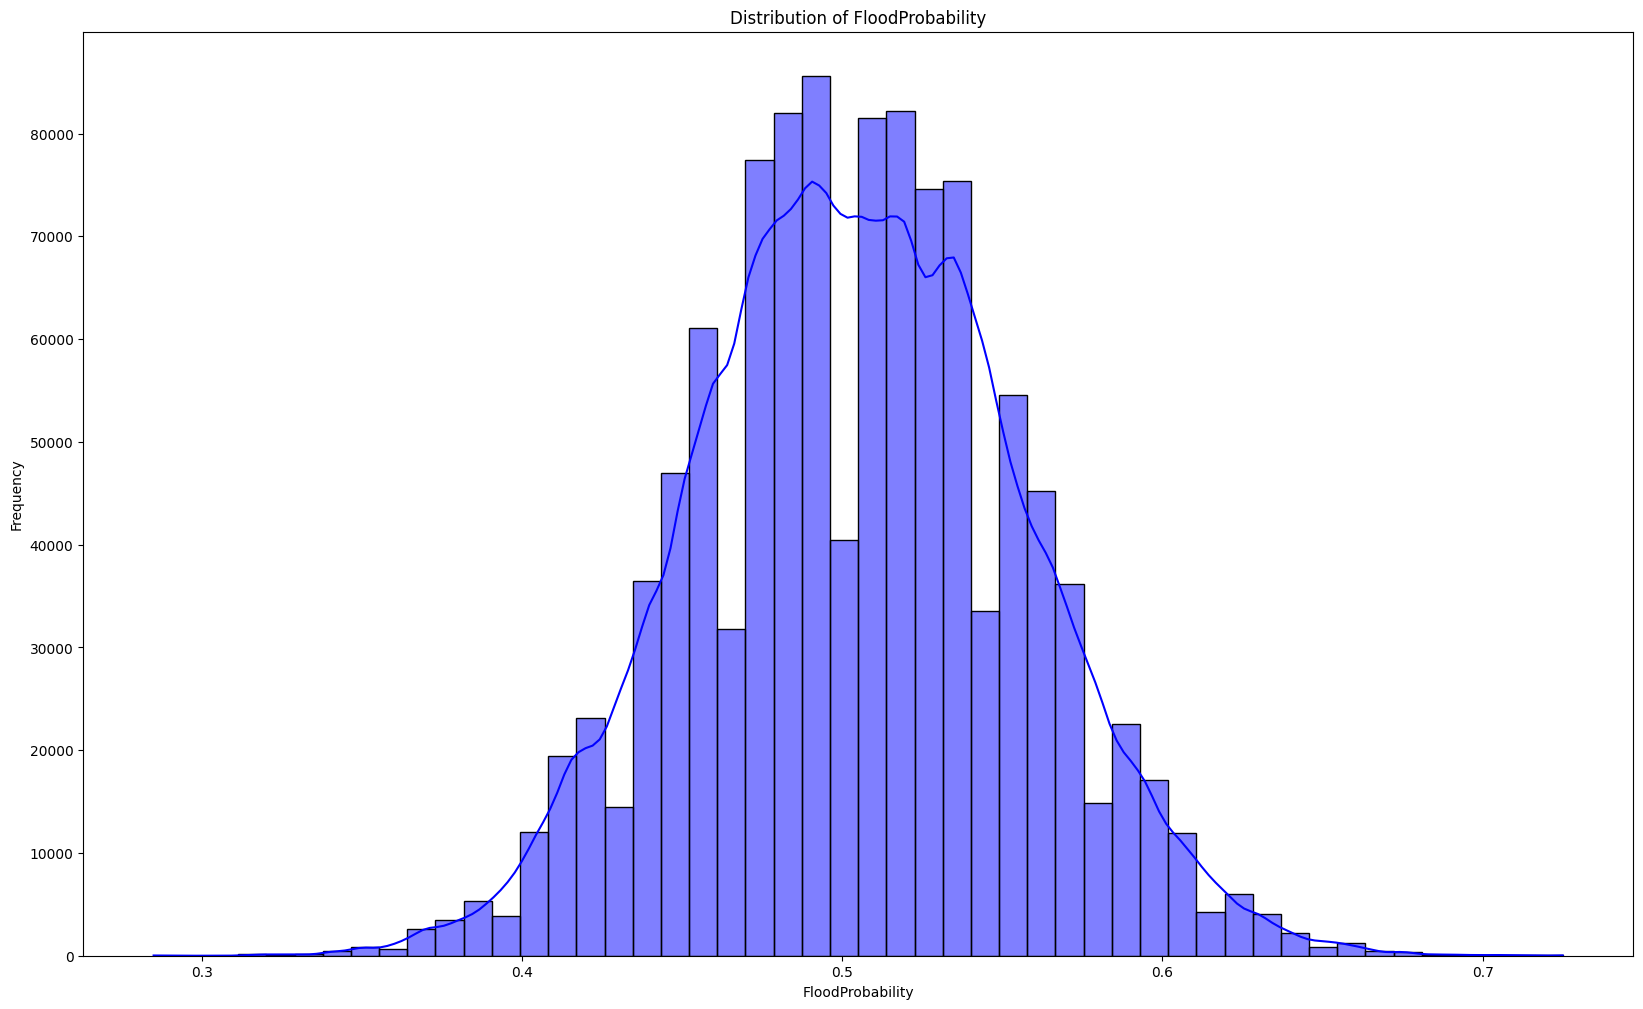

In [ ]:
# Check distribution of the target variable
plt.figure(figsize=(20, 12))
sns.histplot(data['FloodProbability'], kde=True, color='blue', bins=50)
plt.title('Distribution of FloodProbability')
plt.xlabel('FloodProbability')
plt.ylabel('Frequency')
plt.show()

In [ ]:
correlation_matrix = data.corr(numeric_only=True)

In [ ]:
correlation_matrix

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
id,1.000000,-0.000093,-0.001518,-0.000413,-0.000080,0.000580,-0.000188,0.000133,0.000281,-0.000103,...,0.000558,-0.001386,0.001078,0.000215,-0.000385,0.000625,0.000931,-0.001535,-0.000155,-0.000184
MonsoonIntensity,-0.000093,1.000000,-0.007362,-0.008070,-0.007251,-0.009309,-0.008031,-0.007787,-0.007836,-0.008232,...,-0.009716,-0.010659,-0.009121,-0.008900,-0.008486,-0.008679,-0.006811,-0.008155,-0.008474,0.189098
TopographyDrainage,-0.001518,-0.007362,1.000000,-0.009924,-0.008548,-0.010532,-0.009619,-0.007607,-0.009824,-0.009496,...,-0.010056,-0.012526,-0.010240,-0.011067,-0.006628,-0.010815,-0.010267,-0.011617,-0.012350,0.187635
RiverManagement,-0.000413,-0.008070,-0.009924,1.000000,-0.008574,-0.012292,-0.009237,-0.008711,-0.010058,-0.010783,...,-0.011277,-0.011680,-0.008994,-0.011412,-0.005827,-0.006727,-0.010069,-0.009673,-0.011550,0.187131
Deforestation,-0.000080,-0.007251,-0.008548,-0.008574,1.000000,-0.012248,-0.008266,-0.009356,-0.011536,-0.010039,...,-0.010490,-0.012388,-0.009257,-0.010671,-0.008862,-0.011777,-0.011004,-0.010424,-0.009661,0.184001
Urbanization,0.000580,-0.009309,-0.010532,-0.012292,-0.012248,1.000000,-0.011199,-0.011128,-0.010153,-0.010559,...,-0.012572,-0.014497,-0.010582,-0.012107,-0.010656,-0.011485,-0.011023,-0.011584,-0.013005,0.180861
ClimateChange,-0.000188,-0.008031,-0.009619,-0.009237,-0.008266,-0.011199,1.000000,-0.008427,-0.009457,-0.011517,...,-0.009650,-0.013005,-0.009352,-0.009882,-0.006324,-0.010332,-0.009376,-0.010772,-0.011379,0.184761
DamsQuality,0.000133,-0.007787,-0.007607,-0.008711,-0.009356,-0.011128,-0.008427,1.000000,-0.009401,-0.009033,...,-0.010439,-0.012096,-0.009924,-0.009085,-0.009831,-0.009599,-0.009372,-0.011374,-0.013081,0.187996
Siltation,0.000281,-0.007836,-0.009824,-0.010058,-0.011536,-0.010153,-0.009457,-0.009401,1.000000,-0.010179,...,-0.010702,-0.011762,-0.009173,-0.009457,-0.006312,-0.008739,-0.008667,-0.009079,-0.008493,0.186789
AgriculturalPractices,-0.000103,-0.008232,-0.009496,-0.010783,-0.010039,-0.010559,-0.011517,-0.009033,-0.010179,1.000000,...,-0.010845,-0.011415,-0.010624,-0.009901,-0.008708,-0.008958,-0.011392,-0.010418,-0.011157,0.183366


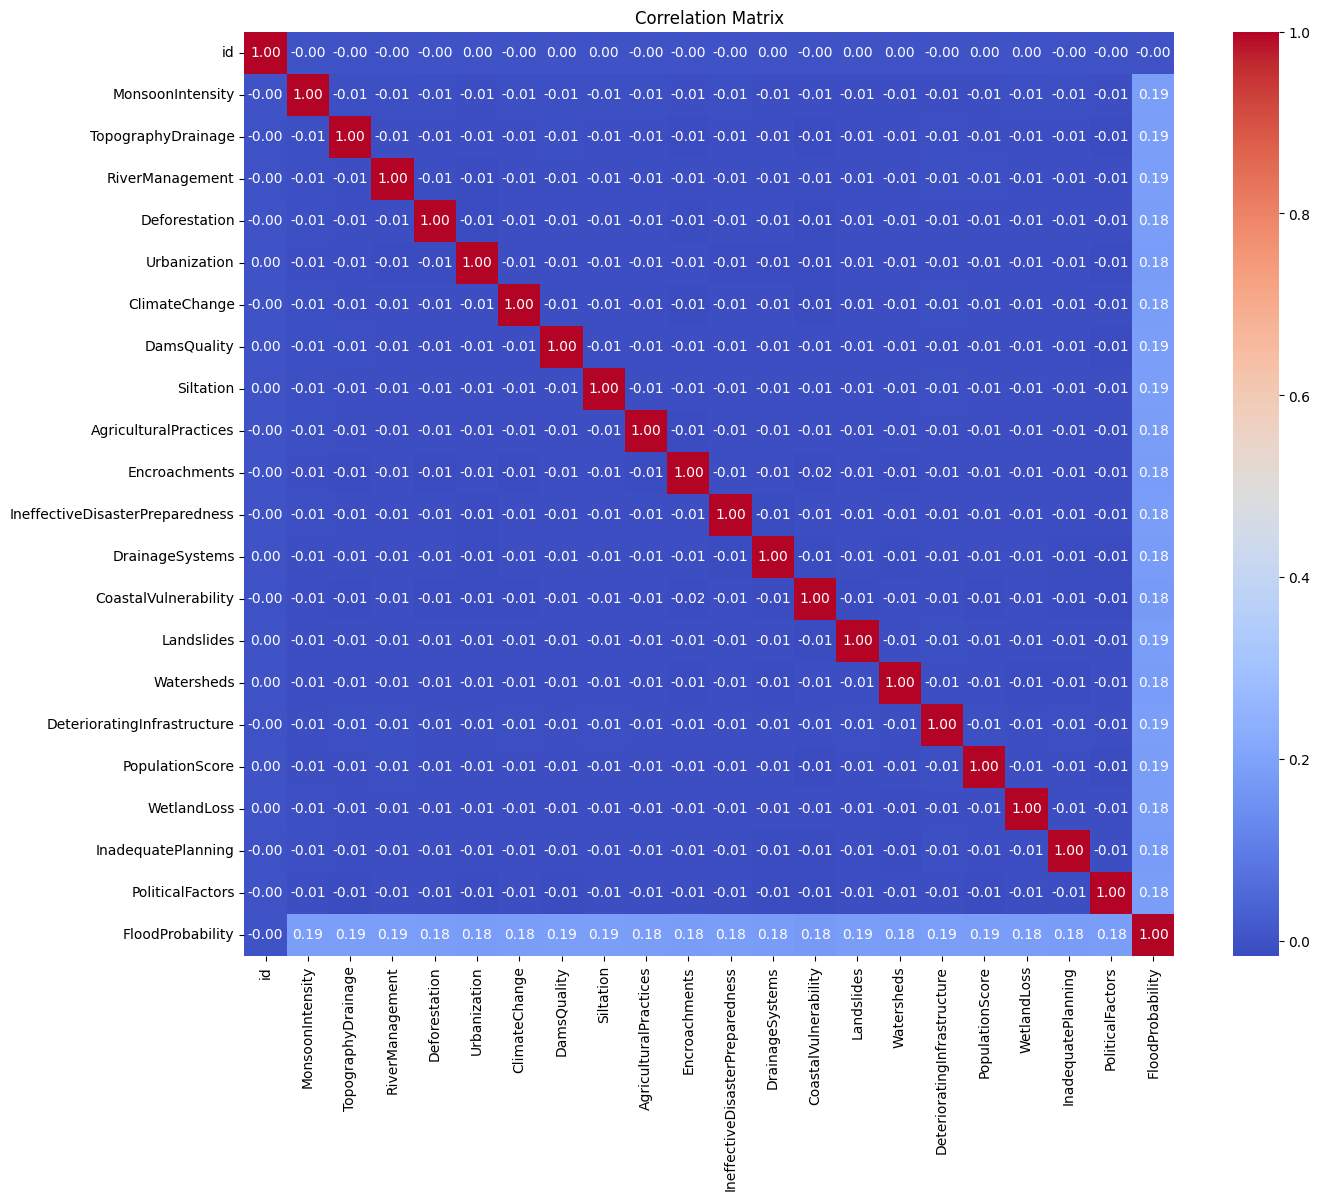

In [ ]:
# Check correlations between numeric variables
correlation_matrix = data.corr(numeric_only=True)

# Visualize the correlation matrix using heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

In [ ]:
missing_values

,0
id,0
MonsoonIntensity,0
TopographyDrainage,0
RiverManagement,0
Deforestation,0
Urbanization,0
ClimateChange,0
DamsQuality,0
Siltation,0
AgriculturalPractices,0


In [ ]:
# Step 3: Prepare the features (X) and target (y)
X = data.drop(columns=['FloodProbability'])
y = data['FloodProbability']

In [ ]:
# Step 4: Normalize the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # Scale only the feature columns

In [ ]:
# Step 5: Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from IPython.display import display, HTML
import ipywidgets as widgets

### Keras Model Definition

First, let's define a simple Keras model creation function. This function will be flexible enough to take the number of input features and output units, which is 1 for regression tasks like flood probability prediction.

In [ ]:
def create_keras_model_test_I(input_shape, learning_rate):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])
    return model

### Hyperparameter Input

Now, let's create interactive input widgets for `Epochs`, `Batch Size`, and `Learning Rate`. You can adjust these values, and they will be used to train the Keras model.

In [ ]:
# Create interactive widgets for hyperparameters
epochs_widget = widgets.IntSlider(min=10, max=200, step=10, value=15, description='Epochs:')
batch_size_widget = widgets.IntSlider(min=16, max=512, step=16, value=350, description='Batch Size:')
learning_rate_widget = widgets.FloatSlider(min=0.0001, max=0.1, step=0.00000001, value=0.099, description='Learning Rate:')

In [ ]:
# Get values from widgets
num_epochs = epochs_widget.value
batch_size= batch_size_widget.value
learning_rate = learning_rate_widget.value

# Create the Keras model with the selected learning rate
input_shape = X_train.shape[1]
keras_model_test_I = create_keras_model_test_I(input_shape, learning_rate)

print(f"Training Keras model with:\nEpochs: {num_epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}")

# Train the model
history = keras_model_test_I.fit(
    X_train, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_split=0.2, # Use a validation split to monitor performance during training
    verbose=1 # Show training progress
)

print("\nKeras Model_test training complete.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training Keras model with:
Epochs: 15
Batch Size: 350
Learning Rate: 0.099
Epoch 1/15
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1861 - rmse: 0.3208 - val_loss: 0.0026 - val_rmse: 0.0511
Epoch 2/15
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0026 - rmse: 0.0510 - val_loss: 0.0026 - val_rmse: 0.0514
Epoch 3/15
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0026 - rmse: 0.0511 - val_loss: 0.0027 - val_rmse: 0.0515
Epoch 4/15
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0026 - rmse: 0.0514 - val_loss: 0.0026 - val_rmse: 0.0511
Epoch 5/15
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0027 - rmse: 0.0517 - val_loss: 0.0027 - val_rmse: 0.0520
Epoch 6/15
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0027 - rmse: 0.0517 - val_loss: 0.0030 - val_rmse: 0.0546
Epoch 7/15
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.0027 - rmse: 0.0517 - val_loss: 0.0026 - val_rmse: 0.0513
Epoch 8/15
2045/2045 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0027 - 

In [ ]:
# Make predictions on the test set
y_pred_keras = keras_model_test_I.predict(X_test, batch_size=batch_size).flatten()
# Evaluate performance
mae_keras_model_test_I = mean_absolute_error(y_test, y_pred_keras)
mse_keras_model_test_I = mean_squared_error(y_test, y_pred_keras)
rmse_keras_model_test_I = np.sqrt(mse_keras_model_test_I)
mape_keras_model_test_I = mean_absolute_percentage_error(y_test, y_pred_keras)
r2_keras_model_test_I = r2_score(y_test, y_pred_keras)

print(f"Keras Model MAE_test_I: {mae_keras_model_test_I}")
print(f"Keras Model MSE_test_I: {mse_keras_model_test_I}")
print(f"Keras Model RMSE_test_I: {rmse_keras_model_test_I}")
print(f"Keras Model MAPE_test_I: {mape_keras_model_test_I}")
print(f"Keras Model R2_test_I: {r2_keras_model_test_I}")

639/639 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Keras Model MAE_test_I: 0.04138241005015717
Keras Model MSE_test_I: 0.0026769532274440104
Keras Model RMSE_test_I: 0.051739281280705963
Keras Model MAPE_test_I: 0.08215087747274466
Keras Model R2_test_I: -0.02988425432371633


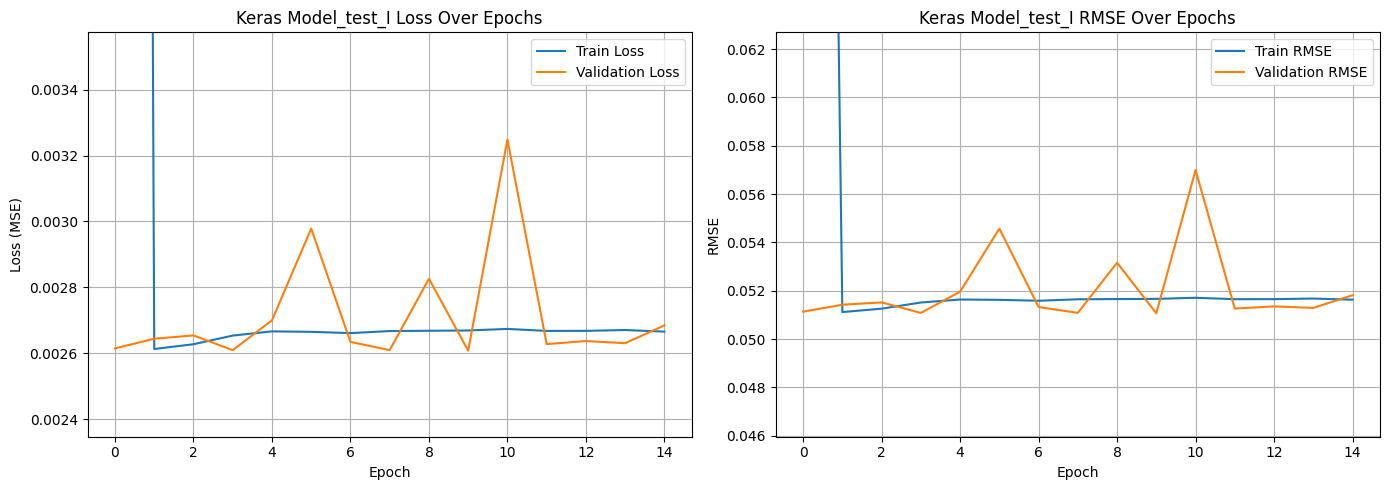

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Keras Model_test_I Loss Over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True)
# Adjust y-axis limits to better visualize changes after initial steep drop
axes[0].set_ylim(min(history.history['val_loss']) * 0.9, max(history.history['val_loss']) * 1.1)

# Plot RMSE - Both training and validation RMSE are crucial for assessing model performance and detecting overfitting.
axes[1].plot(history.history['rmse'], label='Train RMSE')
axes[1].plot(history.history['val_rmse'], label='Validation RMSE')
axes[1].set_title('Keras Model_test_I RMSE Over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('RMSE')
axes[1].legend()
axes[1].grid(True)
# Adjust y-axis limits to better visualize changes after initial steep drop
axes[1].set_ylim(min(history.history['val_rmse']) * 0.9, max(history.history['val_rmse']) * 1.1)

plt.tight_layout()
plt.show()

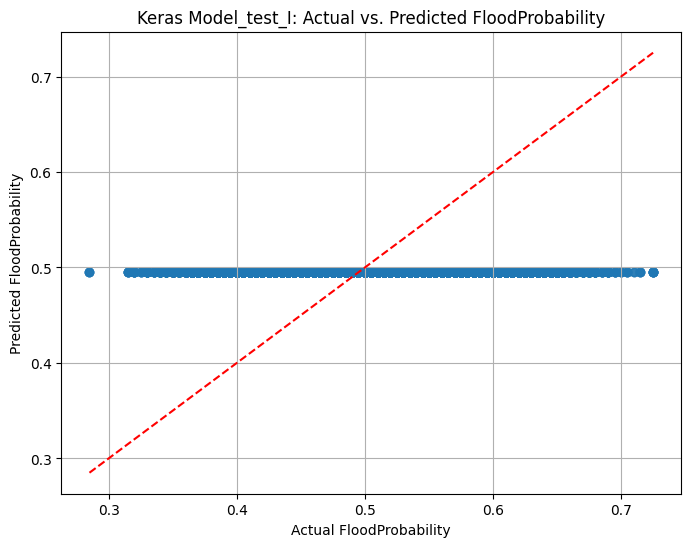

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_keras, alpha=0.6)
plt.xlabel('Actual FloodProbability')
plt.ylabel('Predicted FloodProbability')
plt.title('Keras Model_test_I: Actual vs. Predicted FloodProbability')
plt.grid(True)

min_val = min(y_test.min(), y_pred_keras.min())
max_val = max(y_test.max(), y_pred_keras.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.show()

In [ ]:
def create_keras_model_test_II(input_shape, learning_rate):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_shape,)),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)  # Output layer for regression
    ])
    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=[keras.metrics.RootMeanSquaredError(name='rmse')])
    return model

In [ ]:
# Create interactive widgets for hyperparameters
epochs_widget = widgets.IntSlider(min=10, max=200, step=10, value=20, description='Epochs:')
batch_size_widget = widgets.IntSlider(min=16, max=256, step=16, value=128, description='Batch Size:')
learning_rate_widget = widgets.FloatSlider(min=0.0001, max=0.1, step=0.0000001, value=0.001, description='Learning Rate:')

### Keras Model Training with User-Defined Hyperparameters

Now, let's use the values from the widgets to train our Keras model. After training, we will evaluate its performance.

In [ ]:
# Get values from widgets
num_epochs = epochs_widget.value
batch_size = batch_size_widget.value
learning_rate = learning_rate_widget.value

# Create the Keras model with the selected learning rate
input_shape = X_train.shape[1]
keras_model_test_II = create_keras_model_test_II(input_shape, learning_rate)

print(f"Training Keras model with:\nEpochs: {num_epochs}\nBatch Size: {batch_size}\nLearning Rate: {learning_rate}")

# Train the model
history = keras_model_test_II.fit(
    X_train, y_train,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_split=0.2, # Use a validation split to monitor performance during training
    verbose=1 # Show training progress
)

print("\nKeras Model training complete.")

Training Keras model with:
Epochs: 20
Batch Size: 128
Learning Rate: 0.001
Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5590/5590 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.0188 - rmse: 0.1139 - val_loss: 4.6507e-04 - val_rmse: 0.0216
Epoch 2/20
5590/5590 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 4.4811e-04 - rmse: 0.0212 - val_loss: 3.9127e-04 - val_rmse: 0.0198
Epoch 3/20
5590/5590 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 3.9069e-04 - rmse: 0.0198 - val_loss: 3.7639e-04 - val_rmse: 0.0194
Epoch 4/20
5590/5590 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 3.7250e-04 - rmse: 0.0193 - val_loss: 3.6903e-04 - val_rmse: 0.0192
Epoch 5/20
5590/5590 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 3.7012e-04 - rmse: 0.0192 - val_loss: 3.6972e-04 - val_rmse: 0.0192
Epoch 6/20
5590/5590 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 3.6838e-04 - rmse: 0.0192 - val_loss: 3.6504e-04 - val_rmse: 0.0191
Epoch 7/20
5590/5590 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 3.6757e-04 - rmse: 0.0192 - val_loss: 3.6729e-04 - val_rmse: 0.0192
Epoch 8/20
5590/5590 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - loss: 3.6727e-04 - rmse: 0.0192 - val_los

### Evaluate Keras Model Performance

Let's evaluate the performance of the trained Keras model on the test set.

In [ ]:
# Make predictions on the test set
y_pred_keras = keras_model_test_II.predict(X_test, batch_size=batch_size).flatten()
# Evaluate performance
mae_keras_model_test_II = mean_absolute_error(y_test, y_pred_keras)
mse_keras_model_test_II = mean_squared_error(y_test, y_pred_keras)
rmse_keras_model_test_II = np.sqrt(mse_keras_model_test_II)
mape_keras_model_test_II = mean_absolute_percentage_error(y_test, y_pred_keras)
r2_keras_model_test_II = r2_score(y_test, y_pred_keras)

print(f"Keras Model MAE_test_II: {mae_keras_model_test_II}")
print(f"Keras Model MSE_test_II: {mse_keras_model_test_II}")
print(f"Keras Model RMSE_test_II: {rmse_keras_model_test_II}")
print(f"Keras Model MAPE_test_II: {mape_keras_model_test_II}")
print(f"Keras Model R2_test_II: {r2_keras_model_test_II}")

1747/1747 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Keras Model MAE_test_II: 0.01474561876358425
Keras Model MSE_test_II: 0.0003594727392374776
Keras Model RMSE_test_II: 0.018959766328662322
Keras Model MAPE_test_II: 0.02959219406927813
Keras Model R2_test_II: 0.8617027334643498


### Plotting Keras Model Training History

Let's visualize the training and validation loss and RMSE over epochs.

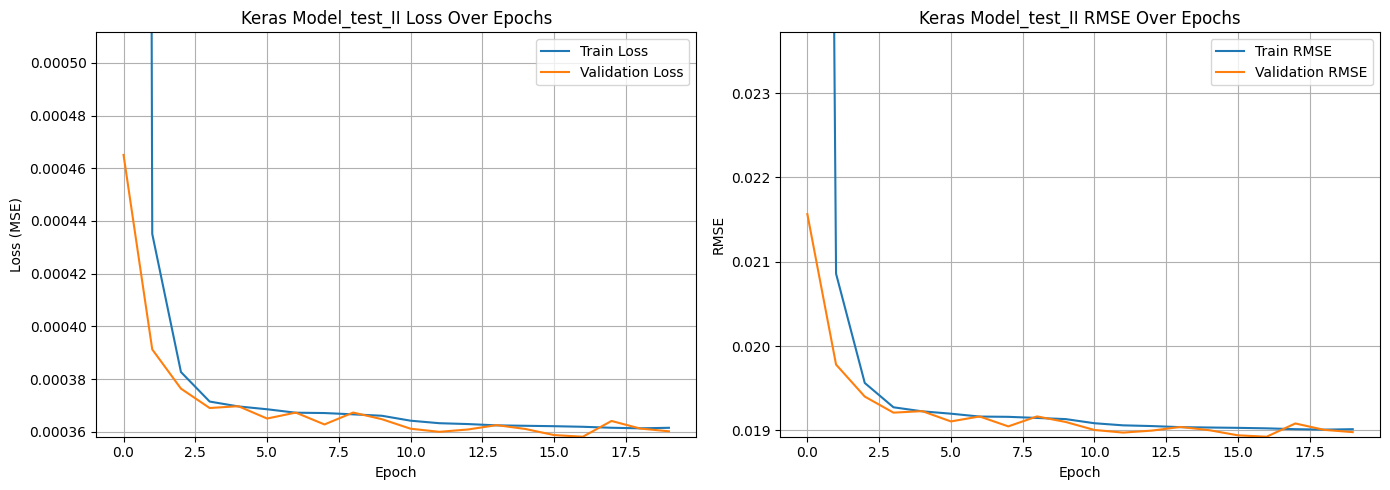

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot loss
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Keras Model_test_II Loss Over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss (MSE)')
axes[0].legend()
axes[0].grid(True)
# Adjust y-axis limits to better visualize changes after initial steep drop
axes[0].set_ylim(min(history.history['val_loss']) , max(history.history['val_loss']) * 1.1)

# Plot RMSE - Both training and validation RMSE are crucial for assessing model performance and detecting overfitting.
axes[1].plot(history.history['rmse'], label='Train RMSE')
axes[1].plot(history.history['val_rmse'], label='Validation RMSE')
axes[1].set_title('Keras Model_test_II RMSE Over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('RMSE')
axes[1].legend()
axes[1].grid(True)
# Adjust y-axis limits to better visualize changes after initial steep drop
axes[1].set_ylim(min(history.history['val_rmse']) , max(history.history['val_rmse']) * 1.1)

plt.tight_layout()
plt.show()

### Visualization of Actual vs. Predicted Values on Training Data

Now, let's visualize how well each model's predictions align with the actual `y_train` values. A perfect prediction would lie on the diagonal red dashed line.

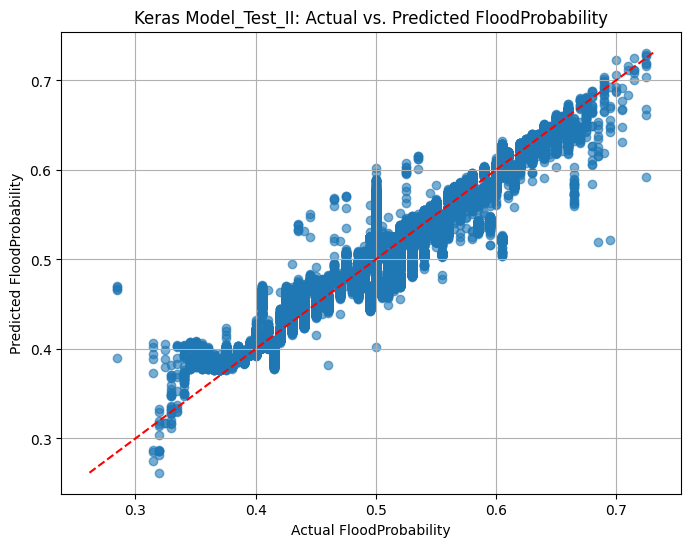

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_keras, alpha=0.6)
plt.xlabel('Actual FloodProbability')
plt.ylabel('Predicted FloodProbability')
plt.title('Keras Model_Test_II: Actual vs. Predicted FloodProbability')
plt.grid(True)

min_val = min(y_test.min(), y_pred_keras.min())
max_val = max(y_test.max(), y_pred_keras.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')
plt.show()

## Display Predictions Summary

In [ ]:
def display_predictions_summary(y_actual, y_predicted, model_name, num_samples=10):
    """
    Displays a summary of actual vs. predicted values for a given model.

    Args:
        y_actual (pd.Series or np.array): Actual target values.
        y_predicted (np.array): Predicted target values.
        model_name (str): Name of the model for display.
        num_samples (int): Number of samples to display.
    """
    # Ensure y_actual and y_predicted are arrays and aligned
    y_actual_array = np.array(y_actual)

    summary_df = pd.DataFrame({
        'Actual FloodProbability': y_actual_array[:num_samples],
        'Predicted FloodProbability': y_predicted[:num_samples],
        'Difference': np.abs(y_actual_array[:num_samples] - y_predicted[:num_samples])
    })
    print(f"\n{model_name} Predictions Summary (First {num_samples} samples):\n")
    print(summary_df.to_string(index=False))


y_pred_keras = keras_model_test_II.predict(X_test).flatten()
display_predictions_summary(y_test, y_pred_keras, 'keras_model_test_II')

6988/6988 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step

keras_model_test_II Predictions Summary (First 10 samples):

 Actual FloodProbability  Predicted FloodProbability  Difference
                   0.560                    0.533035    0.026965
                   0.575                    0.583499    0.008499
                   0.510                    0.523570    0.013570
                   0.530                    0.539185    0.009185
                   0.590                    0.576953    0.013047
                   0.630                    0.638219    0.008219
                   0.455                    0.470407    0.015407
                   0.510                    0.482555    0.027445
                   0.395                    0.397618    0.002618
                   0.460                    0.472814    0.012814


6988/6988 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step
Feature Importances (Keras Model - Permutation Importance):


,feature,importance,std
13,CoastalVulnerability,3.511899e-04,1.560701e-06
2,TopographyDrainage,3.487290e-04,1.077817e-06
5,Urbanization,3.487234e-04,1.039192e-06
9,AgriculturalPractices,3.458690e-04,1.292381e-06
11,IneffectiveDisasterPreparedness,3.452055e-04,1.434407e-06
4,Deforestation,3.446691e-04,2.213474e-06
20,PoliticalFactors,3.444432e-04,9.689647e-07
7,DamsQuality,3.437805e-04,7.253045e-07
14,Landslides,3.427406e-04,7.012626e-07
15,Watersheds,3.426359e-04,4.367049e-07


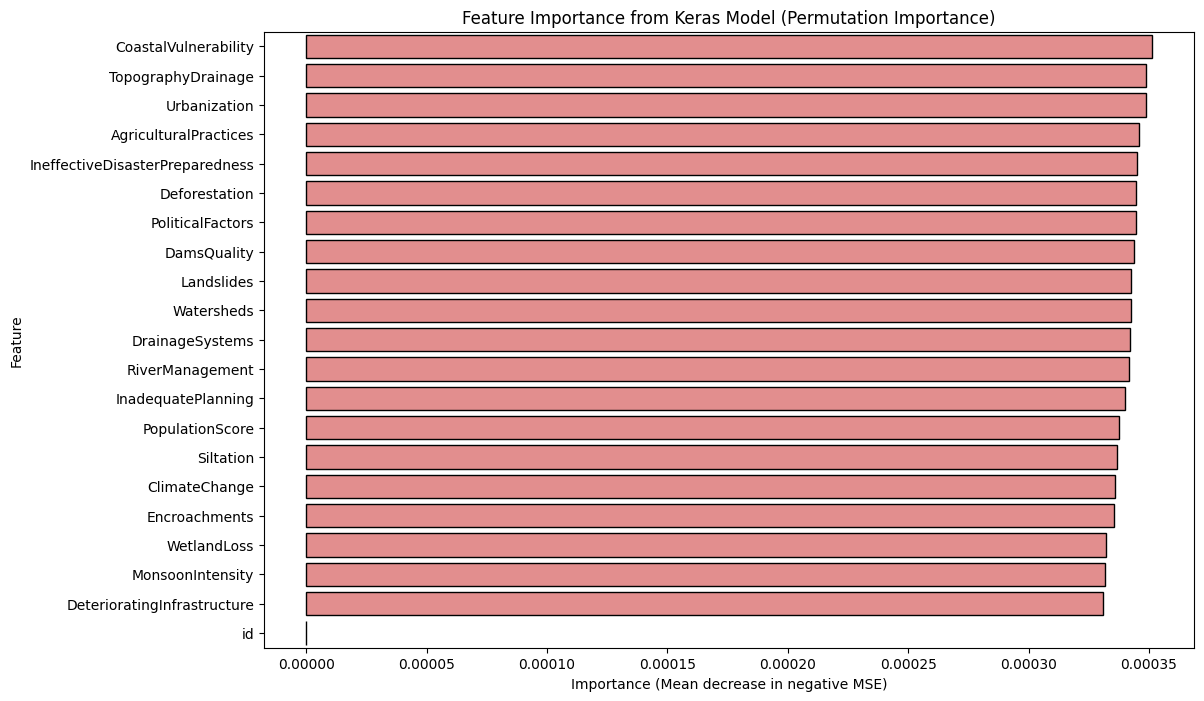

In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error, make_scorer

# Keras models do not have a direct feature_importances_ attribute.
# We will use permutation importance to estimate feature importance for the Keras model.

# Define a scorer for permutation importance (higher is better).
# For regression, we use negative mean_squared_error.
neg_mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Calculate permutation importance for the Keras model
# Assuming 'keras_model_test_II' is the latest trained Keras model
# and X_test, y_test are available from previous data preparation steps.
result = permutation_importance(
    keras_model_test_II, # The trained Keras model
    X_test, # Test features
    y_test, # Test target
    scoring=neg_mse_scorer, # Use negative MSE as scorer
    n_repeats=5, # Number of times to permute a feature
    random_state=42,
    n_jobs=-1 # Use all available CPU cores
)

# Get the names of the features from the original X DataFrame
# X is defined as the DataFrame with all features, including engineered ones.
feature_names = X.columns

# Create a DataFrame to store feature names and their importances
feature_importance_df_keras = pd.DataFrame({
    'feature': feature_names,
    'importance': result.importances_mean,
    'std': result.importances_std
})

# Sort the features by importance in descending order
feature_importance_df_keras = feature_importance_df_keras.sort_values(by='importance', ascending=False)

# Display the feature importances
print("Feature Importances (Keras Model - Permutation Importance):")
display(feature_importance_df_keras)

# Visualize the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df_keras, color='lightcoral', edgecolor='black')
plt.title('Feature Importance from Keras Model (Permutation Importance)')
plt.xlabel('Importance (Mean decrease in negative MSE)')
plt.ylabel('Feature')
plt.show()